## Датасет: [Tesla Insider Trading](https://www.kaggle.com/datasets/ilyaryabov/tesla-insider-trading).

### Описание датасета:

Датасет представляет собой выборку операций с ценными бумагами компании Tesla, совершённых инсайдерами, и является частью более крупного проекта "Insider Trading S&P500 – Inside Info". Данные охватывают транзакции с участием крупных акционеров и должностных лиц компании, включая такие операции, как покупка, продажа и опционы, начиная с 10 ноября 2021 года и до 27 июля 2022 года.

---

### Анализ сведений:

**Проблемная область:**
Проблемная область данного датасета касается анализа инсайдерских сделок в публичных компаниях, а также их влияния на ценообразование акций. Инсайдерские транзакции, совершаемые людьми с доступом к непубличной информации (такими как руководители, крупные акционеры или члены совета директоров), могут быть индикаторами будущих изменений стоимости акций. Исследование таких транзакций помогает понять, как информация внутри компании отражается в действиях ключевых участников, и может выявить паттерны поведения, которые влияют на рынки.

**Актуальность:**
Анализ инсайдерских сделок становится особенно важным в условиях высокой волатильности рынка и неопределенности. Инвесторы, аналитики и компании используют такие данные, чтобы лучше понимать сигналы от крупных акционеров и должностных лиц. Действия инсайдеров, такие как покупки и продажи акций, нередко рассматриваются как индикаторы доверия к компании, что может оказывать значительное влияние на рыночные ожидания и прогнозы.

**Объекты наблюдений:**
Объектами наблюдений в датасете являются инсайдеры компании Tesla — лица, имеющие значительное влияние на управление и информацию компании. Каждый объект характеризуется различными параметрами, включая должность, тип транзакции, количество акций и общую стоимость сделок.

**Атрибуты объектов:**
- Insider Trading: ФИО лица, совершившего транзакцию.
- Relationship: Должность или статус данного лица в компании Tesla.
- Date: Дата завершения транзакции.
- Transaction: Тип транзакции.
- Cost: Цена одной акции на момент совершения транзакции.
- Shares: Количество акций, участвующих в транзакции.
- Value ($): Общая стоимость транзакции в долларах США.
- Shares Total: Общее количество акций, принадлежащих этому лицу после завершения данной транзакции.
- SEC Form 4: Дата записи транзакции в форме SEC Form 4, обязательной для отчётности о сделках инсайдеров.

---

### Выгрузка данных из файла в DataFrame:

In [1]:
import pandas as pd
from pandas import DataFrame


df: DataFrame = pd.read_csv("..//static//csv//TSLA.csv")

# Преобразование типов данных
df["Insider Trading"] = df["Insider Trading"].astype("category")                             # Преобразование в категорию
df["Relationship"] = df["Relationship"].astype("category")                                   # Преобразование в категорию
df["Transaction"] = df["Transaction"].astype("category")                                     # Преобразование в категорию
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")                                      # Преобразование в float
df["Shares"] = pd.to_numeric(df["Shares"].str.replace(",", ""), errors="coerce")             # Преобразование в float с удалением запятых
df["Value ($)"] = pd.to_numeric(df["Value ($)"].str.replace(",", ""), errors="coerce")       # Преобразование в float с удалением запятых
df["Shares Total"] = pd.to_numeric(df["Shares Total"].str.replace(",", ""), errors="coerce") # Преобразование в float с удалением запятых

### Краткая информация о DataFrame:

In [2]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Insider Trading  156 non-null    category
 1   Relationship     156 non-null    category
 2   Date             156 non-null    object  
 3   Transaction      156 non-null    category
 4   Cost             156 non-null    float64 
 5   Shares           156 non-null    int64   
 6   Value ($)        156 non-null    int64   
 7   Shares Total     156 non-null    int64   
 8   SEC Form 4       156 non-null    object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 8.6+ KB


count          mean           std    min          25%  \
Cost          156.0  4.787856e+02  4.489229e+02    0.0      50.5225   
Shares        156.0  5.404666e+05  1.530835e+06  121.0    3500.0000   
Value ($)     156.0  1.818582e+08  4.131734e+08    0.0  271008.0000   
Shares Total  156.0  3.347679e+07  9.553593e+07   49.0   25103.5000   

                      50%           75%           max  
Cost              240.225  9.341075e+02  1.171040e+03  
Shares          10500.000  3.017978e+05  1.192000e+07  
Value ($)     2026823.000  1.487132e+08  2.278695e+09  
Shares Total    73488.000  1.507274e+06  4.554674e+08

### Выбор входных и выходных переменных:

**Входные переменные:**

На основании анализа датасета можно выделить следующие ключевые параметры, которые могут влиять на принятие решения об изменении стоимости акций:
- Transaction (Тип транзакции): Категориальная переменная, указывающая на тип операции (Sale, Option Exercise).
- Cost (Цена акции): Числовая переменная, показывающая стоимость одной акции на момент совершения транзакции.
- Shares (Количество акций): Числовая переменная, указывающая количество акций в транзакции.
- Value ($): Числовая переменная, представляющая общую стоимость транзакции.

**Выходная переменная:**

Impact on Stock Price (Влияние на цену акций): Лингвистическая переменная, описывающая потенциальное влияние транзакции на рыночную цену акций Tesla. Может принимать значения: "Low", "Medium", "High".

---

### Определение лингвистических переменных:

**Лингвистическая переменная** – это переменная, значениями которой являются слова или фразы вместо чисел. Она используется в нечеткой логике и теории нечетких множеств для описания понятий, которые нельзя точно выразить числовыми значениями.

Для каждой переменной определим количество термов, типы и параметры функций принадлежности.

In [3]:
import numpy as np
from skfuzzy import control as ctrl


transaction = ctrl.Antecedent(np.arange(0, 2, 1), "Transaction")
cost = ctrl.Antecedent(np.arange(0, 1200, 1), "Cost")
shares = ctrl.Antecedent(np.arange(0, 12000000, 1), "Shares")
value = ctrl.Antecedent(np.arange(0, 2.3e9, 1e6), "Value")
impact = ctrl.Consequent(np.arange(0, 1, 0.01), "Impact")

### Определение нечетких переменных:

d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


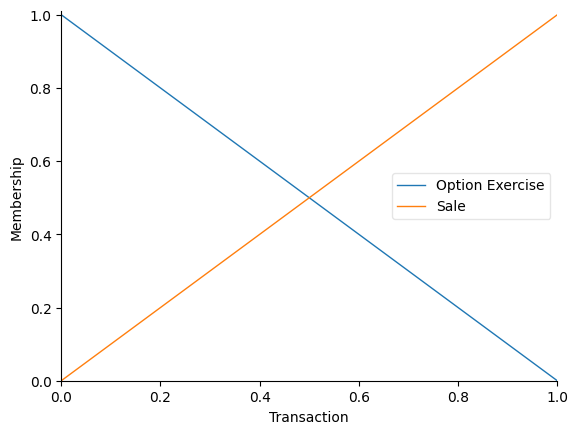

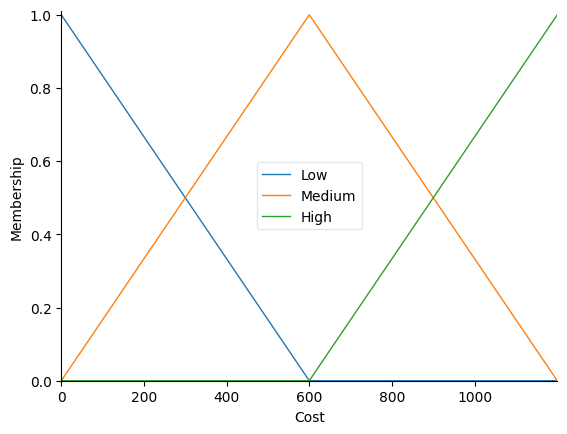

d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


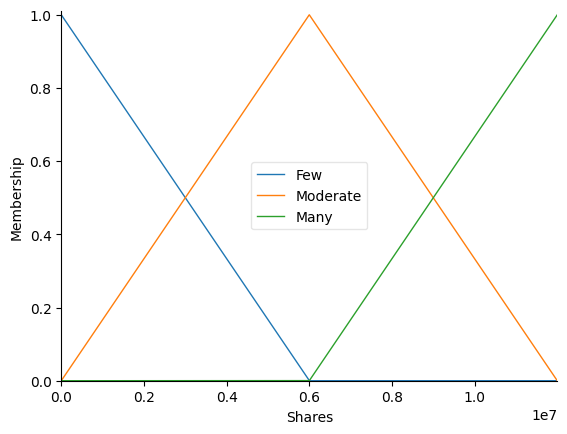

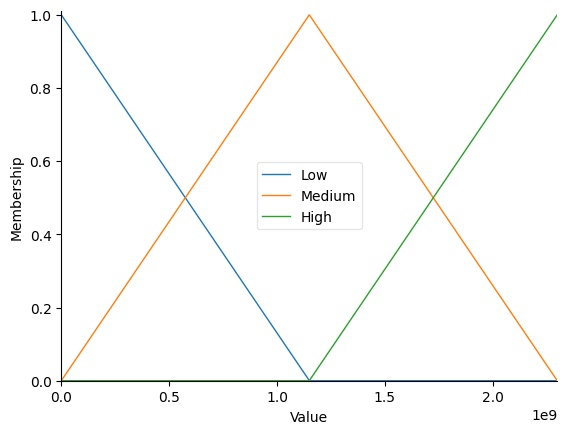

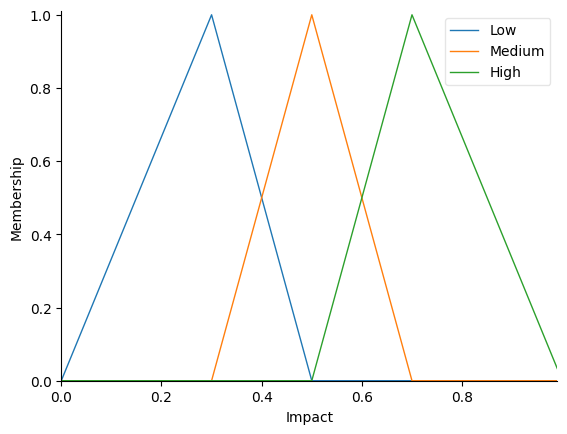

In [4]:
import skfuzzy as fuzz


transaction["Option Exercise"] = fuzz.trimf(transaction.universe, [0, 0, 1])
transaction["Sale"] = fuzz.trimf(transaction.universe, [0, 1, 1])
transaction.view()

# cost["Low"] = fuzz.zmf(cost.universe, 0, 300)
# cost["Medium"] = fuzz.trimf(cost.universe, [250, 500, 750])
# cost["High"] = fuzz.smf(cost.universe, 700, 1200)
cost.automf(3, names=["Low", "Medium", "High"])
cost.view()

# shares["Few"] = fuzz.zmf(shares.universe, 0, 20000)
# shares["Moderate"] = fuzz.trimf(shares.universe, [10000, 50000, 500000])
# shares["Many"] = fuzz.smf(shares.universe, 400000, 12000000)
shares.automf(3, names=["Few", "Moderate", "Many"])
shares.view()

# value["Low"] = fuzz.zmf(value.universe, 0, 5e7)
# value["Medium"] = fuzz.trimf(value.universe, [5e7, 1e8, 1e9])
# value["High"] = fuzz.smf(value.universe, 1e9, 2.3e9)
value.automf(3, names=["Low", "Medium", "High"])
value.view()

impact["Low"] = fuzz.trimf(impact.universe, [0, 0.3, 0.5])
impact["Medium"] = fuzz.trimf(impact.universe, [0.3, 0.5, 0.7])
impact["High"] = fuzz.trimf(impact.universe, [0.5, 0.7, 1])
impact.view()

### Определение нечётких правил:

In [5]:
rule1 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Few"] & value["Low"], impact["Low"])
rule2 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Few"] & value["Medium"], impact["Low"])
rule3 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Few"] & value["High"], impact["Medium"])
rule4 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Moderate"] & value["Low"], impact["Low"])
rule5 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Moderate"] & value["Medium"], impact["Medium"])
rule6 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Moderate"] & value["High"], impact["High"])
rule7 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Many"] & value["Low"], impact["Medium"])
rule8 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Many"] & value["Medium"], impact["High"])
rule9 = ctrl.Rule(transaction["Option Exercise"] & cost["Low"] & shares["Many"] & value["High"], impact["High"])
rule10 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Few"] & value["Low"], impact["Low"])
rule11 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Few"] & value["Medium"], impact["Medium"])
rule12 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Few"] & value["High"], impact["Medium"])
rule13 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Moderate"] & value["Low"], impact["Medium"])
rule14 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Moderate"] & value["Medium"], impact["High"])
rule15 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Moderate"] & value["High"], impact["High"])
rule16 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Many"] & value["Low"], impact["High"])
rule17 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Many"] & value["Medium"], impact["High"])
rule18 = ctrl.Rule(transaction["Option Exercise"] & cost["Medium"] & shares["Many"] & value["High"], impact["High"])
rule19 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Few"] & value["Low"], impact["Medium"])
rule20 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Few"] & value["Medium"], impact["High"])
rule21 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Few"] & value["High"], impact["High"])
rule22 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Moderate"] & value["Low"], impact["High"])
rule23 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Moderate"] & value["Medium"], impact["High"])
rule24 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Moderate"] & value["High"], impact["High"])
rule25 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Many"] & value["Low"], impact["High"])
rule26 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Many"] & value["Medium"], impact["High"])
rule27 = ctrl.Rule(transaction["Option Exercise"] & cost["High"] & shares["Many"] & value["High"], impact["High"])

rule28 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Few"] & value["Low"], impact["Low"])
rule29 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Few"] & value["Medium"], impact["Low"])
rule30 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Few"] & value["High"], impact["Medium"])
rule31 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Moderate"] & value["Low"], impact["Low"])
rule32 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Moderate"] & value["Medium"], impact["Medium"])
rule33 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Moderate"] & value["High"], impact["High"])
rule34 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Many"] & value["Low"], impact["Medium"])
rule35 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Many"] & value["Medium"], impact["High"])
rule36 = ctrl.Rule(transaction["Sale"] & cost["Low"] & shares["Many"] & value["High"], impact["High"])
rule37 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Few"] & value["Low"], impact["Low"])
rule38 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Few"] & value["Medium"], impact["Medium"])
rule39 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Few"] & value["High"], impact["Medium"])
rule40 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Moderate"] & value["Low"], impact["Medium"])
rule41 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Moderate"] & value["Medium"], impact["High"])
rule42 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Moderate"] & value["High"], impact["High"])
rule43 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Many"] & value["Low"], impact["High"])
rule44 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Many"] & value["Medium"], impact["High"])
rule45 = ctrl.Rule(transaction["Sale"] & cost["Medium"] & shares["Many"] & value["High"], impact["High"])
rule46 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Few"] & value["Low"], impact["Medium"])
rule47 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Few"] & value["Medium"], impact["High"])
rule48 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Few"] & value["High"], impact["High"])
rule49 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Moderate"] & value["Low"], impact["High"])
rule50 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Moderate"] & value["Medium"], impact["High"])
rule51 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Moderate"] & value["High"], impact["High"])
rule52 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Many"] & value["Low"], impact["High"])
rule53 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Many"] & value["Medium"], impact["High"])
rule54 = ctrl.Rule(transaction["Sale"] & cost["High"] & shares["Many"] & value["High"], impact["High"])
# Мне не понравилось

### Создание нечеткой системы:

In [6]:
fuzzy_rules: list[ctrl.Rule] = [
    rule1,
    rule2,
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
    rule10,
    rule11,
    rule12,
    rule13,
    rule14,
    rule15,
    rule16,
    rule17,
    rule18,
    rule19,
    rule20,
    rule21,
    rule22,
    rule23,
    rule24,
    rule25,
    rule26,
    rule27,
    rule28,
    rule29,
    rule30,
    rule31,
    rule32,
    rule33,
    rule34,
    rule35,
    rule36,
    rule37,
    rule38,
    rule39,
    rule40,
    rule41,
    rule42,
    rule43,
    rule44,
    rule45,
    rule46,
    rule47,
    rule48,
    rule49,
    rule50,
    rule51,
    rule52,
    rule53,
    rule54,
]

# Создание системы управления
impact_ctrl = ctrl.ControlSystem(fuzzy_rules)

# Стимуляция системы управления
impact_sim = ctrl.ControlSystemSimulation(impact_ctrl)

fuzzy_rules

[IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Few]) AND Value[Low] THEN Impact[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Few]) AND Value[Medium] THEN Impact[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Few]) AND Value[High] THEN Impact[Medium]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Moderate]) AND Value[Low] THEN Impact[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Moderate]) AND Value[Medium] THEN Impact[Medium]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Transaction[Option Exercise] AND Cost[Low]) AND Shares[Moderate]) AND Value[High] THEN Impact[High]
 	AND aggregation function : fm

### Тестирование нечёткой системы:

In [7]:
from sklearn.model_selection import train_test_split


# Функция для предсказания значений
def predict_value(row):
    impact_sim.input["Transaction"] = row["Transaction"]
    impact_sim.input["Cost"] = row["Cost"]
    impact_sim.input["Shares"] = row["Shares"]
    impact_sim.input["Value"] = row["Value ($)"]
    impact_sim.compute()
    return impact_sim.output["Impact"]


# Выбор нужных столбцов
data: DataFrame = df[["Transaction", "Cost", "Shares", "Value ($)"]]

# Разделение данных на обучающую и тестовую выборки (80% / 20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Применение модели к обучающей выборке
train_data["Predicted Impact"] = train_data.apply(predict_value, axis=1)
display(train_data.head(15))

# Применение модели к тестовой выборке
test_data["Predicted Impact"] = test_data.apply(predict_value, axis=1)
display(test_data.head(15))

Transaction     Cost   Shares  Value ($)  Predicted Impact
56   Option Exercise    55.32     2500     138300          0.266602
138  Option Exercise     6.24  2152681   13432729          0.274953
123  Option Exercise     6.24  2134440   13318906          0.274941
128             Sale  1021.56   543452  555171415          0.533072
127             Sale  1044.54   390639  408039939          0.520312
66              Sale   722.10     3500    2527350          0.312546
42   Option Exercise     0.00     8228          0          0.266667
26              Sale   179.57    10500    1885485          0.266098
134  Option Exercise     0.00     3283          0          0.266667
79              Sale   987.53   215528  212841259          0.460339
131             Sale   980.47      917     899091          0.386775
36              Sale   300.59     3750    1127212          0.262058
75   Option Exercise    62.72     3500     219520          0.266626
22   Option Exercise     0.00    16871          0          0.266666
135  Option Exercise     6.24  2133441   13312672          0.274941

Transaction     Cost   Shares   Value ($)  Predicted Impact
96   Option Exercise    62.72     3500      219520          0.266626
69              Sale   887.99      121      107447          0.358446
82              Sale   889.08  2258486  2007978676          0.635263
76              Sale   899.42     3500     3147970          0.362990
114             Sale   979.69   340564   333647031          0.484696
29              Sale   208.58  9650000  2012758726          0.677352
94   Option Exercise    52.38    25000     1309500          0.268332
132  Option Exercise     0.00     1786           0          0.266667
93   Option Exercise     0.00     1786           0          0.266667
139             Sale  1171.04   126471   148102963          0.531335
19              Sale   178.07     3768      670935          0.265018
90              Sale   845.39     1535     1297675          0.347088
15              Sale   158.37  6870000  1088011570          0.566694
125             Sale   965.62   764980   738683277          0.537231
24              Sale   189.50     3750      710625          0.264788